In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/BEAUTIQUE DATA SYNC OPERATION AND INTEGRATION  ON BEAUTY PARLOUR AND BOUTIQUE BUSINESS (23).xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Sheet1")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dates              181 non-null    object 
 1   Parlour Services   92 non-null     object 
 2   Boutique Services  36 non-null     object 
 3   Cosmetics Sales    23 non-null     object 
 4   Quantity           151 non-null    float64
 5   Amount             151 non-null    float64
dtypes: float64(2), object(4)
memory usage: 8.6+ KB


In [ ]:
df.describe()

,Quantity,Amount
count,151.000000,151.000000
mean,1.576159,189.139073
std,0.905075,664.321148
min,1.000000,10.000000
25%,1.000000,20.000000
50%,1.000000,50.000000
75%,2.000000,200.000000
max,5.000000,8000.000000


In [ ]:
df.sample()

,Dates,Parlour Services,Boutique Services,Cosmetics Sales,Quantity,Amount
164,20-04-2025,Threading,NaN,NaN,3.0,60.0


In [ ]:
df.head()

,Dates,Parlour Services,Boutique Services,Cosmetics Sales,Quantity,Amount
0,25-01-2025,Threading,NaN,NaN,3.0,60.0
1,25-01-2025,NaN,Saree Pico,NaN,3.0,30.0
2,26-01-2025,Clean up,NaN,NaN,1.0,300.0
3,26-01-2025,Threading,NaN,NaN,2.0,20.0
4,27-01-2025,NaN,NaN,NaN,NaN,NaN


In [ ]:

revenue_sources = ['Parlour Services', 'Boutique Services', 'Cosmetics Sales']
df_melted = df.melt(id_vars=['Amount'], value_vars=revenue_sources, var_name='Service Type', value_name='Service')
df_melted = df_melted.dropna(subset=['Service'])
revenue_pie = df_melted.groupby('Service Type')['Amount'].sum()


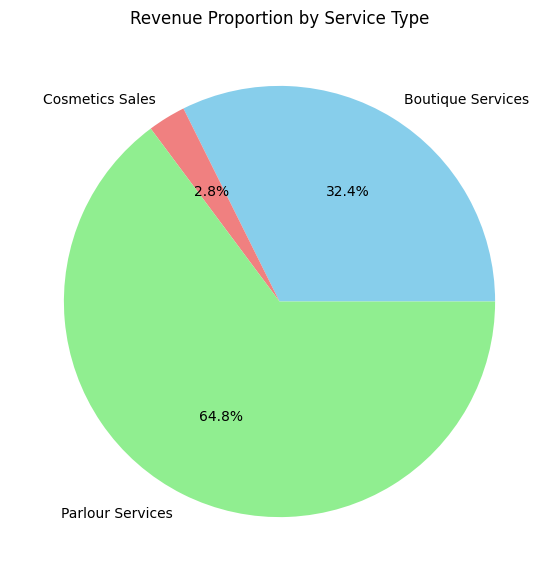

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(revenue_pie, labels=revenue_pie.index, autopct='%1.1f%%', colors=["skyblue", "lightcoral", "lightgreen"])
plt.title("Revenue Proportion by Service Type")
plt.show()


In [ ]:
Bussines_closure = df['Amount'].isnull()
Bussines_closure

,Amount
0,False
1,False
2,False
3,False
4,True
...,...
176,False
177,False
178,False
179,False


In [ ]:
Bussines_closure.sum()

np.int64(30)

In [ ]:
Total_sales_day = df['Dates'].count()

In [ ]:
Percentage_of_closed_day = (Bussines_closure.sum() / Total_sales_day) * 100
Percentage_of_closed_day

np.float64(16.574585635359114)

In [ ]:
# Grouped analysis by Parlor Services
grouped_parlor = df[df['Parlour Services'].notna()].groupby('Parlour Services').agg({
    'Amount': 'sum',
    'Quantity': 'sum'
})
Parlor_revenue_per_unit = grouped_parlor['Revenue per Unit'] = grouped_parlor['Amount'] / grouped_parlor['Quantity']

In [ ]:
Parlor_revenue_per_unit

,0
Parlour Services,
Bridal Makeup,8000.000000
Clean up,300.000000
Facial,750.000000
Forehead,10.000000
Foundation,110.000000
Hair Cut,51.666667
Manicure,250.000000
Nail Polish,30.000000
Nails Paint,20.000000


In [ ]:
# Grouped analysis by Boutique Services
grouped_parlor = df[df['Boutique Services'].notna()].groupby('Boutique Services').agg({
    'Amount': 'sum',
    'Quantity': 'sum'
})
Boutique_revenue_per_unit = grouped_parlor['Revenue per Unit'] = grouped_parlor['Amount'] / grouped_parlor['Quantity']

In [ ]:
Boutique_revenue_per_unit

,0
Boutique Services,
Blouse Sewing,162.045455
Kurti fitting,60.000000
Lehenga Blouse Sewing,500.000000
Saree Pico,10.000000
Saree fall sewing,60.000000
Suit Fitting,20.000000
Suit Sewing,200.000000


In [ ]:
# Grouped analysis by Cosmatics Sales
grouped_parlor = df[df['Cosmetics Sales'].notna()].groupby('Cosmetics Sales').agg({
    'Amount': 'sum',
    'Quantity': 'sum'
})
Cosmatic_revenue_per_unit = grouped_parlor['Revenue per Unit'] = grouped_parlor['Amount'] / grouped_parlor['Quantity']
Cosmatic_revenue_per_unit


,0
Cosmetics Sales,
Bindi,10.0
Cluture,10.0
Foundation kit,110.0
Fruit Cream,10.0
Hair Colour,10.0
Kajal pencil,10.0
Lipstick,50.0
Lipstick,50.0
Nail polish,26.0


SKUs: 29


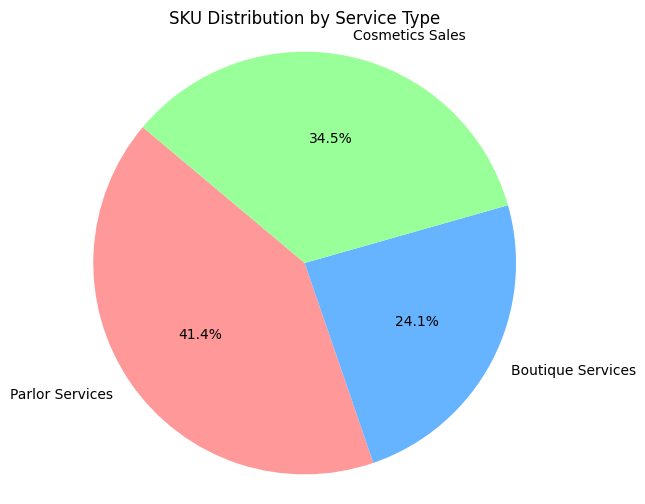

In [ ]:

# Calculate the total number of unique services offered
total_parlor_services = df['Parlour Services'].nunique()
total_boutique_services = df['Boutique Services'].nunique()
total_cosmetics_services = df['Cosmetics Sales'].nunique()

total_services = total_parlor_services + total_boutique_services + total_cosmetics_services

print(f"SKUs: {total_services}")
labels = ['Parlor Services', 'Boutique Services', 'Cosmetics Sales']
sizes = [total_parlor_services, total_boutique_services, total_cosmetics_services]
colors = ['#ff9999','#66b3ff','#99ff99']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('SKU Distribution by Service Type')
plt.axis('equal')
plt.show()


In [ ]:


# cost price mappings
parlour_costs = {
    'Threading': 5,
    'Clean up': 90,
    'Upper lips': 5,
    'Facial': 100,
    'Bridal Makeup': 800,
    'Forehead': 2,
    'Foundation': 50,
    'Hair Cut': 10,
    'Manicure': 100,
    'Nail Polish': 10,
    'Nails Paint' : 7,
    'Side Makeup': 200

}

boutique_costs = {
    'Saree Pico': 5,
    'Blouse Sewing': 40,
    'Kurti fitting': 5,
    'Lehenga Blouse Sewing': 150,
    'Saree fall sewing': 30,
    'Suit Fitting': 5,
    'Suit Sewing': 15
}

cosmetics_costs = {
    'Lipstick': 30,
    'Foundation kit': 30,
    'Bindi': 3,
    'Hair Colour': 6,
    'Fruit Cream': 7,
    'Kajal pencil': 4,
    'Nail polish': 10,
    'Powder': 7,
    'Cluture': 3
}

def get_parlour_cost(service):
    if pd.isna(service):
        return None
    return parlour_costs.get(service, None)

def get_boutique_cost(service):
    if pd.isna(service):
        return None
    return boutique_costs.get(service, None)

def get_cosmetics_cost(product):
    if pd.isna(product):
        return None
    return cosmetics_costs.get(product, None)

# Create new cost columns
df['Parlour Cost'] = df['Parlour Services'].apply(get_parlour_cost)
df['Boutique Cost'] = df['Boutique Services'].apply(get_boutique_cost)
df['Cosmetics Cost'] = df['Cosmetics Sales'].apply(get_cosmetics_cost)


# Determine total cost from first non-null cost column
def get_total_cost(row):
    for col in ['Parlour Cost', 'Boutique Cost', 'Cosmetics Cost']:
        if pd.notna(row[col]):
            return row[col]
    return np.nan

df['Cost Price'] = df.apply(get_total_cost, axis=1)

# Calculate selling price per unit
def get_selling_price_per_unit(row):
    if pd.isna(row['Amount']) or pd.isna(row['Quantity']) or row['Quantity'] == 0:
        return None
    return round(row['Amount'] / row['Quantity'], 2)

df['Selling Price'] = df.apply(get_selling_price_per_unit, axis=1)

# Calculate profit percentage
def calculate_profit_pct(row):
    if pd.isna(row['Selling Price']) or pd.isna(row['Cost Price']) or row['Cost Price'] == 0:
        return None
    return round(((row['Selling Price'] - row['Cost Price']) / row['Cost Price']) * 100, 2)

df['Profit %'] = df.apply(calculate_profit_pct, axis=1)




# Save to a new file
output_path = "Updated_Beautique_Data_With_All_Cost_Prices.xlsx"
df.to_excel(output_path, index=False)

print(f"Updated file saved as: {output_path}")


Updated file saved as: Updated_Beautique_Data_With_All_Cost_Prices.xlsx


In [ ]:
updated = pd.read_excel('/content/Updated_Beautique_Data_With_All_Cost_Prices.xlsx')

In [ ]:
updated.describe()

,Quantity,Amount,Parlour Cost,Boutique Cost,Cosmetics Cost,Cost Price,Selling Price,Profit %
count,151.000000,151.000000,92.000000,36.000000,22.000000,150.000000,151.000000,150.000000
mean,1.576159,189.139073,33.630435,36.111111,12.000000,31.053333,158.300199,307.553533
std,0.905075,664.321148,89.929486,23.025176,11.526367,71.738225,661.641603,227.182263
min,1.000000,10.000000,2.000000,5.000000,3.000000,2.000000,10.000000,0.000000
25%,1.000000,20.000000,5.000000,30.000000,3.000000,5.000000,20.000000,233.330000
50%,1.000000,50.000000,5.000000,40.000000,6.500000,5.500000,20.000000,300.000000
75%,2.000000,200.000000,10.000000,40.000000,25.000000,40.000000,150.000000,300.000000
max,5.000000,8000.000000,800.000000,150.000000,30.000000,800.000000,8000.000000,1233.330000


In [ ]:
max_profit_service = updated[updated['Profit %'] == updated['Profit %'].max()]
max_profit_service

,Dates,Parlour Services,Boutique Services,Cosmetics Sales,Quantity,Amount,Parlour Cost,Boutique Cost,Cosmetics Cost,Cost Price,Selling Price,Profit %
45,20-02-2025,NaN,Suit Sewing,NaN,1.0,200.0,NaN,15.0,NaN,15.0,200.0,1233.33
92,20-03-2025,NaN,Suit Sewing,NaN,1.0,200.0,NaN,15.0,NaN,15.0,200.0,1233.33
108,27-03-2025,NaN,Suit Sewing,NaN,1.0,200.0,NaN,15.0,NaN,15.0,200.0,1233.33
158,18-04-2025,NaN,Suit Sewing,NaN,1.0,200.0,NaN,15.0,NaN,15.0,200.0,1233.33
170,21-04-2025,NaN,Suit Sewing,NaN,1.0,200.0,NaN,15.0,NaN,15.0,200.0,1233.33


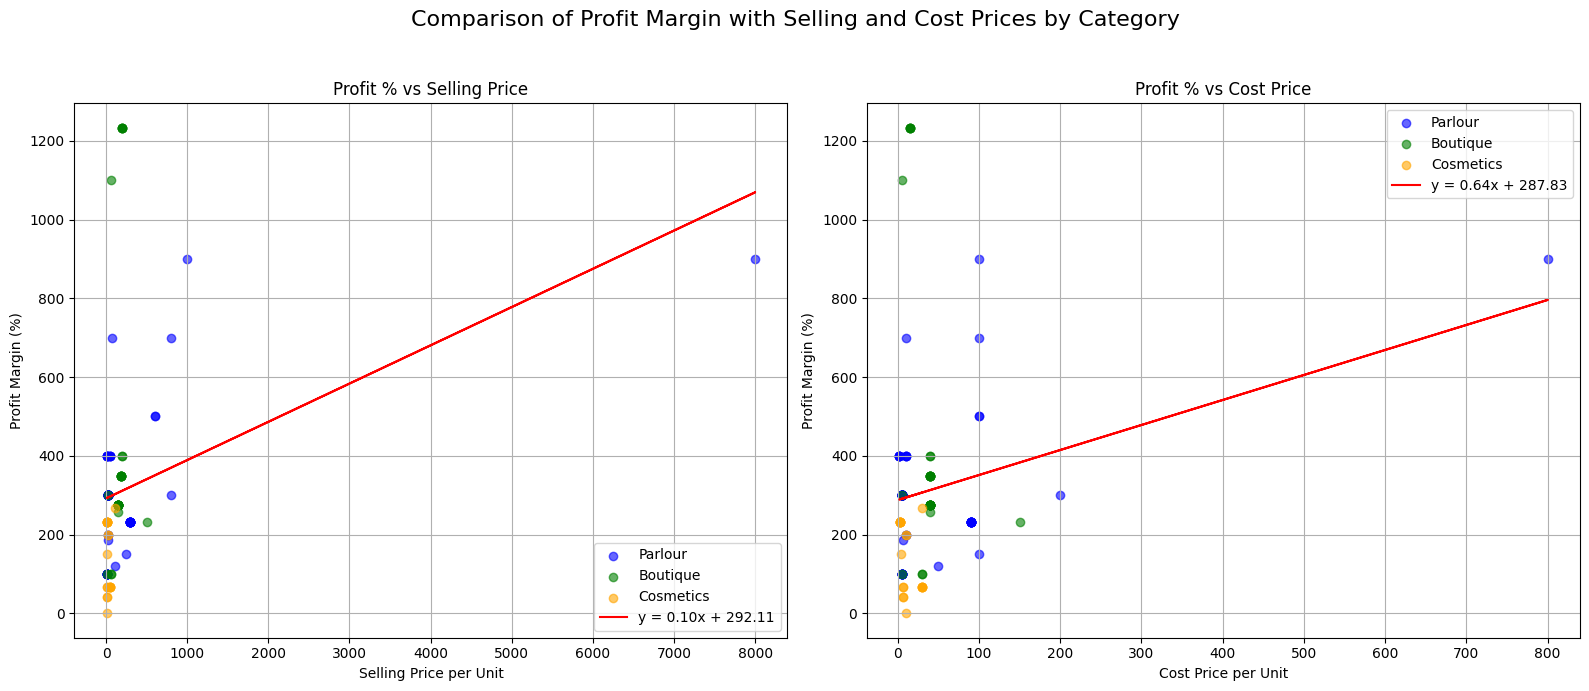

In [ ]:
# Service category
def get_category(row):
    if pd.notna(row['Parlour Services']):
        return 'Parlour'
    elif pd.notna(row['Boutique Services']):
        return 'Boutique'
    elif pd.notna(row['Cosmetics Sales']):
        return 'Cosmetics'
    return 'Unknown'
df['Category'] = df.apply(get_category, axis=1)

plot_df = df.dropna(subset=['Selling Price', 'Cost Price', 'Profit %'])

# Category colors
colors = {'Parlour': 'blue', 'Boutique': 'green', 'Cosmetics': 'orange'}

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(16, 7))



# 1. Profit % vs Selling Price
x1, y1 = plot_df['Selling Price'], plot_df['Profit %']
m1, b1 = np.polyfit(x1, y1, 1)
axs[0].set_title("Profit % vs Selling Price")
axs[0].set_xlabel("Selling Price per Unit")
axs[0].set_ylabel("Profit Margin (%)")
for cat, color in colors.items():
    subset = plot_df[plot_df['Category'] == cat]
    axs[0].scatter(subset['Selling Price'], subset['Profit %'], alpha=0.6, label=cat, color=color)
axs[0].plot(x1, m1*x1 + b1, color='red', label=f'y = {m1:.2f}x + {b1:.2f}')
axs[0].legend()
axs[0].grid(True)

# 2. Profit % vs Cost Price
x2, y2 = plot_df['Cost Price'], plot_df['Profit %']
m2, b2 = np.polyfit(x2, y2, 1)
axs[1].set_title("Profit % vs Cost Price")
axs[1].set_xlabel("Cost Price per Unit")
axs[1].set_ylabel("Profit Margin (%)")
for cat, color in colors.items():
    subset = plot_df[plot_df['Category'] == cat]
    axs[1].scatter(subset['Cost Price'], subset['Profit %'], alpha=0.6, label=cat, color=color)
axs[1].plot(x2, m2*x2 + b2, color='red', label=f'y = {m2:.2f}x + {b2:.2f}')
axs[1].legend()
axs[1].grid(True)

plt.suptitle("Comparison of Profit Margin with Selling and Cost Prices by Category", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'], dayfirst=True, errors='coerce')
df['DateStr'] = df['Dates'].dt.strftime('%Y-%m-%d')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Profit %'] = pd.to_numeric(df['Profit %'], errors='coerce')

def detect_service(row):
    if pd.notna(row['Parlour Services']):
        return 'Parlour'
    elif pd.notna(row['Boutique Services']):
        return 'Boutique'
    else:
        return 'Cosmetic'

df['Service Type'] = df.apply(detect_service, axis=1)




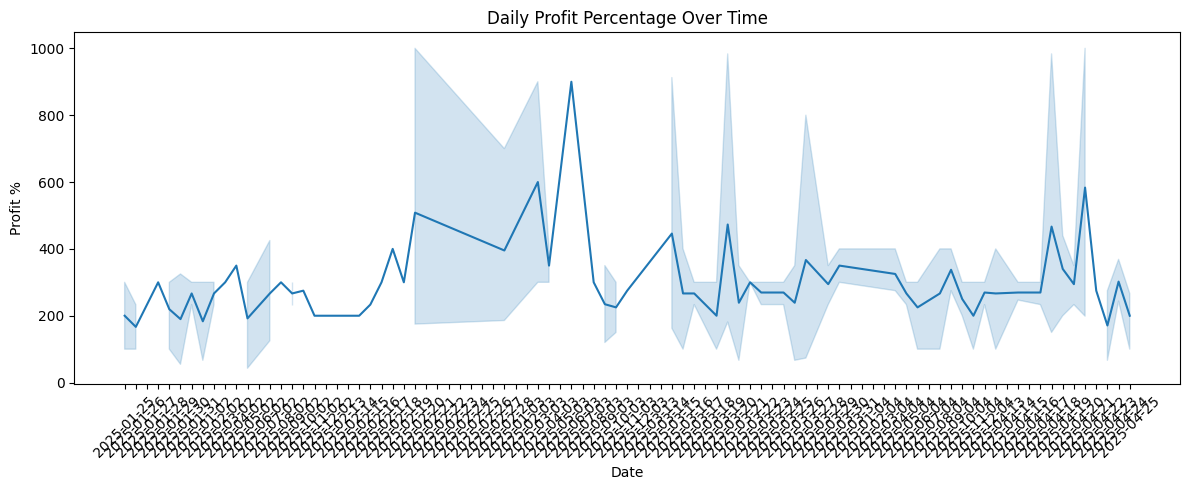

In [ ]:
# 1. Daily Profit Percentage
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['DateStr'], y=df['Profit %'])
plt.title("Daily Profit Percentage Over Time")
plt.xlabel("Date")
plt.ylabel("Profit %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


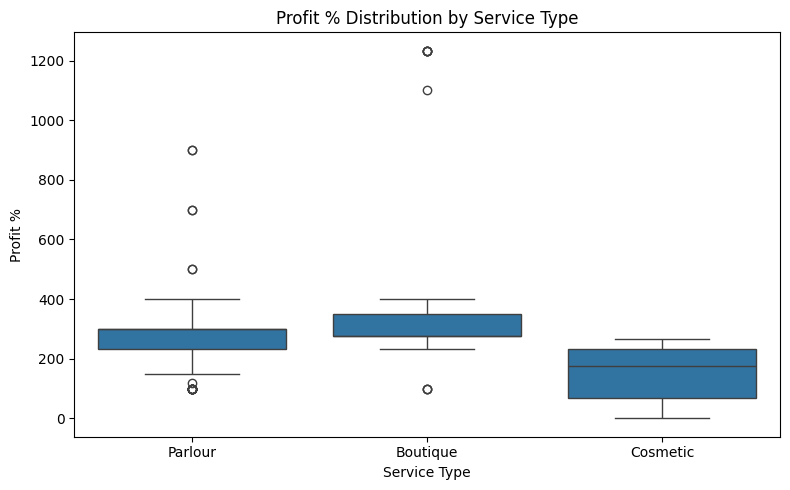

In [ ]:
# 2. Profit% Distribution by Service Type
plt.figure(figsize=(8, 5))
sns.boxplot(x="Service Type", y="Profit %", data=df)
plt.title("Profit % Distribution by Service Type")
plt.tight_layout()
plt.show()

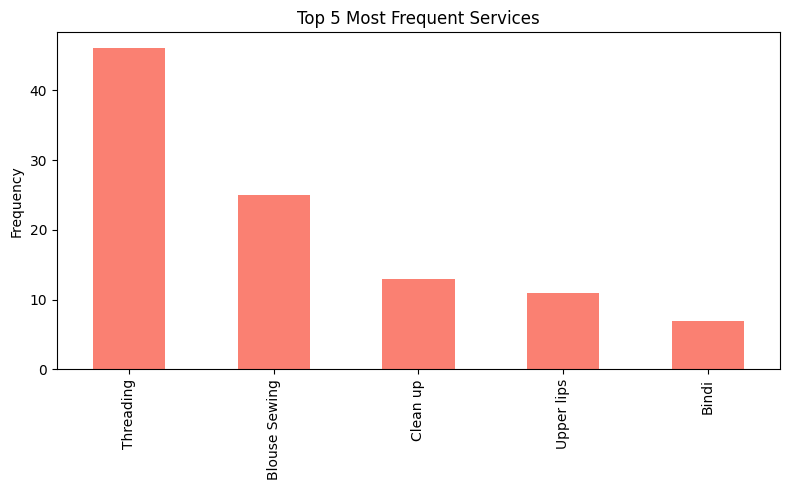

In [ ]:
# 3. Top 5 Most Frequent Services
all_services = pd.concat([
    df['Parlour Services'].dropna(),
    df['Boutique Services'].dropna(),
    df['Cosmetics Sales'].dropna()
])
top_services = all_services.value_counts().nlargest(5)
plt.figure(figsize=(8, 5))
top_services.plot(kind='bar', color='salmon')
plt.title("Top 5 Most Frequent Services")
plt.ylabel("Frequency")
plt.xlabel("Service")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

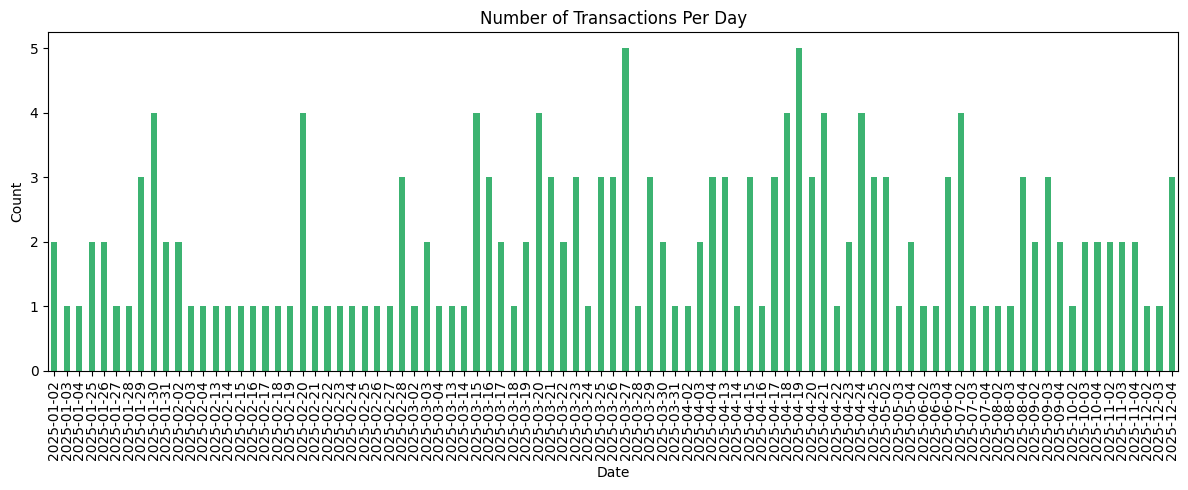

In [ ]:

# 4. Transactions Per Day
transactions_per_day = df.groupby('DateStr').size()
plt.figure(figsize=(12, 5))
transactions_per_day.plot(kind='bar', color='mediumseagreen')
plt.title("Number of Transactions Per Day")
plt.ylabel("Count")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

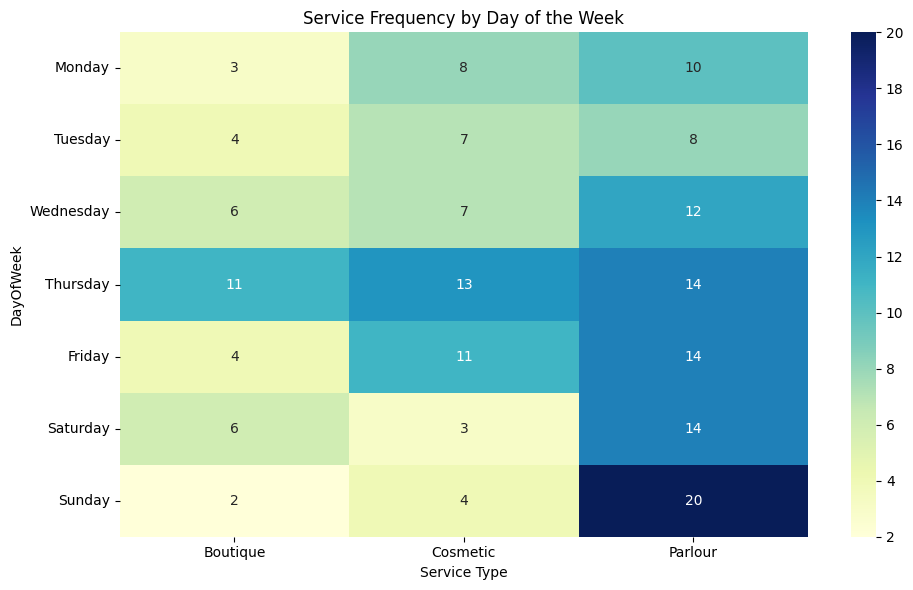

In [ ]:
# 5. Heatmap: Service Frequency by Day of Week
df['DayOfWeek'] = df['Dates'].dt.day_name()
service_freq = df.groupby(['DayOfWeek', 'Service Type']).size().unstack(fill_value=0)
service_freq = service_freq.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.heatmap(service_freq, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Service Frequency by Day of the Week")
plt.tight_layout()
plt.show()